# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import csv

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [59]:
cities_df = pd. DataFrame(cities)
df = cities_df.rename(columns={0:"Name"})
df.head()

,Name
0,luancheng
1,klaksvik
2,leh
3,seoul
4,cervo


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [60]:
# Iterate trough the rows of the DataFrame, taking the name as the "Key" ans searching the weather of it. 

for index, row in df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    #units = "metric"
    units = "imperial"
    query_url = f"{base_url}appid={api_key}&units={units}&q="
    city = row['Name']
    response = requests.get(query_url + city).json()
    
    # Complete the DataFrame with the columns that we want. If there's any city whit lacking information, pass to the next
    try:
        
        # poner al ultimo!!!!!!!!!!!!!!!, demora mucho en salir el codigo print(f"processing {city}") 
        #no necesario lat.append(response['coord']['lat'])
        df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        df.loc[index,"Country"] = response["sys"]["country"]
        df.loc[index,"Date"] = response["dt"]
        df.loc[index,"Humidity"] = response["main"]["humidity"]
        df.loc[index, "Lat"] = response['coord']['lat']
        df.loc[index,"Lng"] = response["coord"]["lon"]
        df.loc[index,"Max Temp"] = response["main"]["temp_max"]
        df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        
    except (KeyError, IndexError):
        pass
        #poner al ultimo!!!!!!!!!!!!!!!!, demora mucho en salir el codigo. print("Missing field/result... skipping.")

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# Summarize columns object count 
df.count()

Name          543
Lat           543
Lng           543
Humidity      543
Max Temp      543
Wind Speed    543
Cloudiness    543
Country       543
Date          543
dtype: int64

In [36]:
# Leave behing (dropping) all rows that has any of the columns 
df = df.dropna()

# Poer al ultimo!!!!!!!!!!!!!!!!!!!!!!!!!!!!Tranform column "Date" from exponential to integer 
df["Date"] = df["Date"].astype(int)

# Showing complete DataFrame
df.head()

,Name,Lat,Lng,Humidity,Max Temp,Wind Speed,Cloudiness,Country,Date
0,luancheng,37.88,114.65,47.0,37.40,4.47,0.0,CN,1551312000
1,klaksvik,62.23,-6.59,86.0,33.80,6.87,0.0,FO,1551313200
2,leh,34.16,77.58,57.0,-16.87,0.60,56.0,IN,1551314304
3,seoul,37.57,126.98,69.0,37.40,1.12,90.0,KR,1551313200
4,cervo,-22.19,-46.24,92.0,66.21,2.73,36.0,BR,1551314305


In [ ]:
# Transform "Date" column from Unix into DayTime
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'],unit='s')

df.head()

In [38]:
# Save Data into a csv
df.to_csv("WeatherPy.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

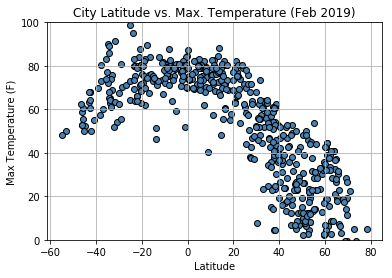

In [62]:
#Scarett plot Latitude vs. Max Temp 

x_axis = df["Lat"]
y_axis = df["Max Temp"]

plt.title("City Latitude vs. Max. Temperature (Feb 2019)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="steelblue",edgecolors="black")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

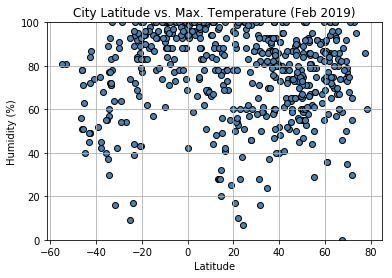

In [66]:
# Scarett plot Latitude vs. Humidity

x_axis = df["Lat"]
y_axis = df["Humidity"]

plt.title("City Latitude vs. Max. Temperature (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.ylim(0, 100)
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

In [63]:
#### Latitude vs. Cloudiness Plot

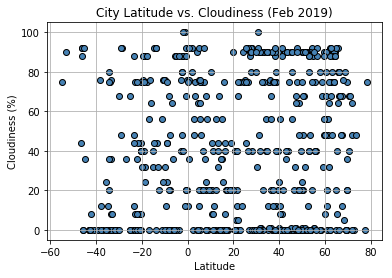

In [64]:
# Scarett plot Latitude vs. Cloudiness Plot

x_axis = df["Lat"]
y_axis = df["Cloudiness"]

plt.title("City Latitude vs. Cloudiness (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

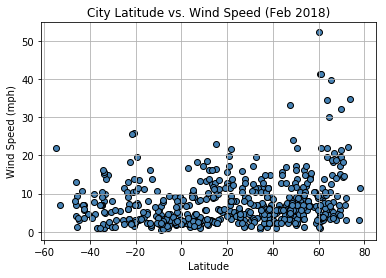

In [65]:
# Scarett plot Latitude vs. Wind Speed Plot

x_axis = df["Lat"]
y_axis = df["Wind Speed"]

plt.title("City Latitude vs. Wind Speed (Feb 2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")
plt.savefig("Latitude vs. Wind Speed Plot.png")
plt.show()

In [3]:
Date


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce